# Regresión Lineal Multiple

##### Nombre: Soria Colque Franz Ronald
 
github: https://github.com/FranzDS01/InteligenciaArtifical/blob/main/Examen%20Laboratorio/Regresion_Multiple.ipynb


Datos para la admisión en la Universidad 
probabilidad de ser admitido 0 a 100%



In [25]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [26]:
data = pd.read_csv('./dataset/data01_admision_UNI.csv')
data = data.drop('Serial No.', axis=1)
data.info()
data = data.to_numpy()
dataPruba = data.copy()
y = data[:, 7]
X = data[:,:7]
m = y.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [27]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [28]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [29]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [30]:
X[0]

array([1.        , 1.76210664, 1.74697064, 0.79882862, 1.09386422,
       1.16732114, 1.76481828, 0.90911166])

In [31]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [32]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por descenso de gradiente: [ 0.72431728  0.02397849  0.02024213  0.00752952 -0.00158175  0.02055865
  0.06180336  0.01187953]
y real: [308.   101.     2.     3.     4.     7.9    0.     0.68]
[  1.  308.  101.    2.    3.    4.    7.9   0. ]
probabilidad de admision a la U : %60


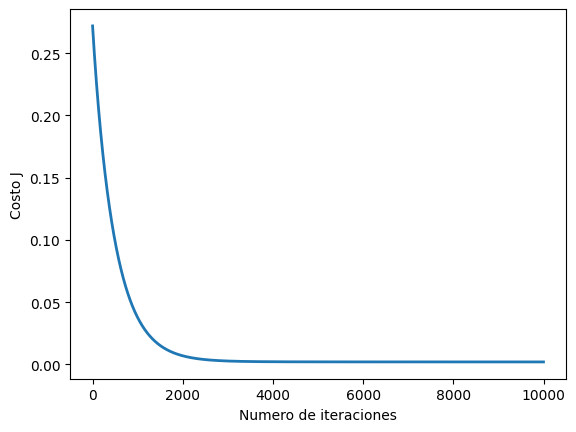

In [33]:

alpha = 0.001 # alpha 0.001 mejor valor
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por descenso de gradiente: {:s}'.format(str(theta)))
Xprueba =dataPruba[7:8,:7]
print('y real:',dataPruba[7])
Xprueba =np.insert(Xprueba,0,1)
print(Xprueba)
Xprueba[1:] = (Xprueba[1:] - mu) / sigma
price = np.dot(Xprueba, theta)   # Se debe cambiar esto
print('probabilidad de admision a la U : %{:.00f}'.format(price*100))

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [34]:
data =pd.read_csv('./dataset/data01_admision_UNI.csv')
data = data.drop('Serial No.', axis=1)
data.info()
data = data.to_numpy()
dataPruba = data.copy()
y = data[:, 7]
X = data[:, :7]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [35]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [36]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

Xprueba = dataPruba[7:8, :7]
print('y real:', dataPruba[7])
Xprueba = np.insert(Xprueba, 0, 1)
print(Xprueba)

price = np.dot(Xprueba, theta) 

print('Probabilidad de admision a la U: %{:.0f}'.format(price*100))

Theta calculado a partir de la ecuación de la normal: [-1.25943248  0.00173741  0.00291958  0.00571666 -0.00330517  0.02235313
  0.11893945  0.02452511]
y real: [308.   101.     2.     3.     4.     7.9    0.     0.68]
[  1.  308.  101.    2.    3.    4.    7.9   0. ]
Probabilidad de admision a la U: %60
